# 뉴스 요약봇 만들기

## 학습 목표
1. Extractive/Abstractive summarization 이해하기
2. 단어장 크기를 줄이는 다양한 text normalization 적용해보기
3. seq2seq의 성능을 up시키는 attention mechanism 적용하기

텍스트 요약은 크게 2가지 접근이 있다.
1. Extractive Summarization
2. Abstractive Summarization

### Extractive Summarization
원문에서 문장들을 추출해 요약하는 방식. 문장의 연결이 자연스럽지 않을 수 있다.    
딥 러닝 보다는 전통적인 머신러닝 방식에 속하는 텍스트 랭크(Text Rank)와 같은 알고리즘을 사용.    
어떤 것이 중요한 문장인지 알 수 있을까??

### Abstractive Summarization
원문으로부터 내용이 요약된 새로운 문장을 생성하는 것이다. 자연어 처리 분야 중 자연어 생성(NLG)의 영역이다. 추출적 요약은 어느 것이 요약문에 들어갈 핵심문장인지를 판별하기 때문에 문장 분류(Text Classification)문제로 볼 수 있다.

_RNN에 대해서 정리가 필요_

https://zdnet.co.kr/view/?no=20160905114833&from=Mobile

구글에서는 자동 헤드라인 만들어주는데 seq2seq 방식을 적용했다.    
seq2seq = incoder-decoder RNN.   
양방향 인코더를 사용하여 요약하는 모델의 기본.

![image](https://user-images.githubusercontent.com/63278762/129995127-efedd9ce-1955-482a-8eb5-7229317f65d9.png)

* Encoder : 입력된 원문을 하나의 고정된 벡터로 변환 = context vector라고 한다.
* Decoder : context vector을 가지고 요약 문장을 완성한다.

_계속 Encoder, Decoder가 나오는데 머신러닝에서 이것의 개념은 뭘까??_

### LSTM과 컨텍스트 벡터
seq2seq를 구현할 때, 인코더/디코더로 바닐라 RNN이 아닌 LSTM을 사용한다.    

#### LSTM vs Vanilla RNN
time step 셀에 hidden state 뿐만 아니라 cell state도 함께 전달한다.    
따라서, 인코더가 디코더에 전달하는 컨텍스트 벡터 또한 hidden state와 cell state 두개의 값 모두 존재해야 한다.    
_vanilla RNN : 순정 RNN을 의미_

### 시작 토큰과 종료 토큰
디코더는 SOS가 입력되면 각 시점마다 단어를 생성하고 이과정을 EOS를 예측하는 순간까지 멈추지 않는다.    
따라서 훈련 데이터의 예측 대상 시퀀스 앞, 뒤에 시작 토큰과 종료 토큰을 넣어주는 전처리가 필요하다.

### Attention Mechanism을 통한 새로운 컨텍스트 벡터 사용하기
**왜 Attention Mechanism을 사용했을까?**    
RNN계열의 한계(Long-Term Dependency)
Attention Mechanism은 인코더의 모든 step의 hidden state의 정보가 컨텍스트 벡터에 전부 반영되도록 하는 것.    
But!! 인코더의 모든 hidden state가 동일한 비중으로 반영되는 것이 아닌, 디코더의 현재 time step의 예측에 인코더의 각 step이 얼마나 영향을 미치는지에 따른 가중합으로 계산된다.    
https://arxiv.org/pdf/1812.02303.pdf    

attention mechanism은 디코더의 현재 문장 생성부위마다 입력데이터가 해석한 컨텍스트 벡터가 다른 값이 된다. 기본적인 seq2seq 모델은 디코더의 현재 스텝과 무관하게 한번 계산되면 고정값을 가지는데 attention mechanism이 도입되면서 디코더의 현재 스텝에 따라 달라지는 인코더의 컨텍스트 벡터를 사용하면 디코더가 더 정확한 예측을 한다. attention기법은 다양한 딥러닝 분야를 획기적으로 발전시킨 개념이다.

1. seq2seq를 사용한다.
2. LSTM을 사용하므로 hidden state뿐만 아니라 cell state도 함께 전달한다.
3. 디코더의 예측 시퀀스 앞뒤에 SOS, EOS를 붙여야 한다.
4. seq2seq를 구동시키면 디코더는 시작토큰을 받아 예측을 시작한다.
5. attention mechanism을 이용해 인코더의 hidden state의 중요도를 취합한 컨텍스트 벡터를 디코더 스텝별로 계산한다.
6. 계산된 컨텍스트 벡터를 이용해 디코더는 다음 등장할 단어를 예측한다.

## Encoder Decoder Model

https://ichi.pro/ko/inkodeo-dikodeo-model-ilan-mueos-ibnikka-148106938965530

![image](https://user-images.githubusercontent.com/63278762/130000183-935d48f5-81cd-41c0-bacc-178cfba4728c.png)

#### Encoder
데이터를 필요한 형식으로 변환하는 것이다. 인코더는 RNN을 사용한다. output = hidden state = 마지막 RNN의 타임 스텝

#### Decoder
이해가능한 언어로 변환한다.    

이 모델의 주요 장점은 입력과 출력의 시퀀스의 길이가 다를 수 있다는 것이다.    
이 모델의 주요 한계는 긴 입력 시퀀스에 대해 모든 정보를 1차원 벡터로 요약해야 한다는 것이다.

# 실습

## 1. 데이터 준비하기
이번엔 NLTK라는 불용어 를 사용한다.

* bs4 : html 요소에 접근하는 모듈

In [1]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /aiffel/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [2]:
import numpy as np
import pandas as pd
import os
import re
import matplotlib.pyplot as plt

from nltk.corpus import stopwords
from bs4 import BeautifulSoup
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import urllib.request

In [3]:
data = pd.read_csv(os.getenv("HOME")+"/aiffel/news_summarization/data/Reviews.csv", nrows=100000)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 100000


In [4]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [5]:
# 사용할 Summary와 Text만 따로 저장한다.
data = data[['Text','Summary']]
data.head()

,Text,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


## 2. 데이터 전처리하기

### 중복값과 null값 제거

In [6]:
print('Text 열에서 중복을 배제한 유일한 샘플의 수 :', data['Text'].nunique())
print('Summary 열에서 중복을 배제한 유일한 샘플의 수 :', data['Summary'].nunique())

Text 열에서 중복을 배제한 유일한 샘플의 수 : 88426
Summary 열에서 중복을 배제한 유일한 샘플의 수 : 72348


In [11]:
print(f'Text 열 중복 샘플 비율: {round((len(data)-data["Text"].nunique())/len(data)*100,2)}%')
print(f'Summary 열 중복 샘플 비율: {round((len(data)-data["Summary"].nunique())/len(data)*100,2)}%')

Text 열 중복 샘플 비율: 11.57%
Summary 열 중복 샘플 비율: 27.65%


Summary는 짧은 요약들도 존재해서 중복이 될 수도 있지만 Text의 경우 중복이 될 수 없는 데이터이기 때문에    
Text가 중복되는 경우만 삭제한다.

In [12]:
data.drop_duplicates(subset = ['Text'], inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88426


In [14]:
print('null인 샘플 수')
print(data.isnull().sum())

null인 샘플 수
Text       0
Summary    1
dtype: int64


In [15]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88425


### 텍스트 정규화와 불용어 제거

In [17]:
contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
print(f'정규화 사전 수: {len(contractions)}')

정규화 사전 수: 117


In [20]:
# 불용어 제거
print('불용어 개수 :', len(stopwords.words('english') ))
print(stopwords.words('english'))

불용어 개수 : 179
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 's

In [21]:
# 데이터 전처리 함수
def preprocess_sentence(sentence, remove_stopwords=True):
    sentence = sentence.lower() # 텍스트 소문자화
    sentence = BeautifulSoup(sentence, "lxml").text # <br />, <a href = ...> 등의 html 태그 제거
    sentence = re.sub(r'\([^)]*\)', '', sentence) # 괄호로 닫힌 문자열 (...) 제거 Ex) my husband (and myself!) for => my husband for
    sentence = re.sub('"','', sentence) # 쌍따옴표 " 제거
    sentence = ' '.join([contractions[t] if t in contractions else t for t in sentence.split(" ")]) # 약어 정규화
    sentence = re.sub(r"'s\b","", sentence) # 소유격 제거. Ex) roland's -> roland
    sentence = re.sub("[^a-zA-Z]", " ", sentence) # 영어 외 문자(숫자, 특수문자 등) 공백으로 변환
    sentence = re.sub('[m]{2,}', 'mm', sentence) # m이 3개 이상이면 2개로 변경. Ex) ummmmmmm yeah -> umm yeah
    
    # 불용어 제거 (Text)
    if remove_stopwords:
        tokens = ' '.join(word for word in sentence.split() if not word in stopwords.words('english') if len(word) > 1)
    # 불용어 미제거 (Summary)
    else:
        tokens = ' '.join(word for word in sentence.split() if len(word) > 1)
    return tokens

In [22]:
temp_text = 'Everything I bought was great, infact I ordered twice and the third ordered was<br />for my mother and father.'
temp_summary = 'Great way to start (or finish) the day!!!'

print(preprocess_sentence(temp_text))
print(preprocess_sentence(temp_summary, False))  # 불용어를 제거하지 않습니다.

everything bought great infact ordered twice third ordered wasfor mother father
great way to start the day


#### MultiProcessing

In [23]:
import multiprocessing as mp   # 멀티 프로세싱으로 전처리 속도를 획기적으로 줄여봅시다
from multiprocessing import Pool
import numpy as np
import time
from functools import partial  # map을 할 때 함수에 여러 인자를 넣어줄 수 있도록 합니다

start = time.time()

# num_cores 만큼 쪼개진 데이터를 전처리하여 반환합니다
def appendTexts(sentences, remove_stopwords):
    texts = []
    for s in sentences:
        texts += preprocess_sentence(s, remove_stopwords),
    return texts

def preprocess_data(data, remove_stopwords=True):
    start_time = time.time()
    num_cores = mp.cpu_count()  # 컴퓨터의 코어 수를 구합니다

    text_data_split = np.array_split(data, num_cores)  # 코어 수만큼 데이터를 배분하여 병렬적으로 처리할 수 있게 합니다
    pool = Pool(num_cores)

    processed_data = np.concatenate(pool.map(partial(appendTexts, remove_stopwords=remove_stopwords), text_data_split))  # 각자 작업한 데이터를 하나로 합쳐줍니다
    pool.close()
    pool.join()
    print(time.time() - start_time, " seconds")
    return processed_data

clean_text = preprocess_data(data['Text'])  # 클라우드 기준으로 3~4분 정도 소요 됩니다
print(clean_text)

clean_summary = preprocess_data(data['Summary'], remove_stopwords=False) # 클라우드 기준 1분정도 소요됩니다.
print(clean_summary)

298.16442131996155  seconds
['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better'
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo'
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch'
 ...
 'favorite brand korean ramen spicy used eating spicy food make sure use spice pack add egg soup makes great snack'
 'like noodles although say spicy somewhat understatement one else family tolerates spicy well seeing looking forward extra little something palate disappointed completely honest usually drain liquid almost much'
 'love noodle twice week amazing thing feel wel

/opt/conda/lib/python3.7/site-packages/bs4/__init__.py:282: UserWarning: "http://www.amazon.com/gp/product/b007i7yygy/ref=cm_cr_rev_prod_title" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup


6.842278242111206  seconds
['good quality dog food' 'not as advertised' 'delight says it all' ...
 'great ramen' 'spicy'
 'this spicy noodle cures my cold upset stomach and headache every time']


In [24]:
data['Text'] = clean_text
data['Summary'] = clean_summary

# 빈 값을 Null 값으로 변환
data.replace('', np.nan, inplace=True)

In [25]:
data.isnull().sum()

Text        0
Summary    70
dtype: int64

In [26]:
data.dropna(axis=0, inplace=True)
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 88355


### 훈련데이터와 테스트데이터 나누기

#### 샘플의 최대 길이 정하기

텍스트의 최소 길이 : 2
텍스트의 최대 길이 : 1235
텍스트의 평균 길이 : 38.78053307679249
요약의 최소 길이 : 1
요약의 최대 길이 : 28
요약의 평균 길이 : 4.032776866051723


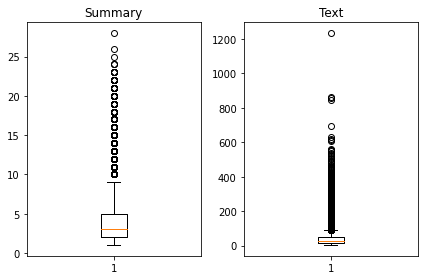

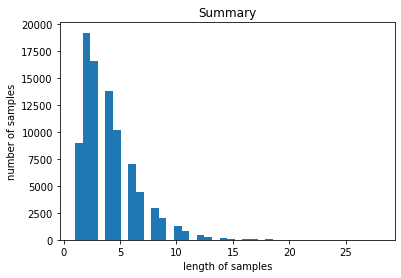

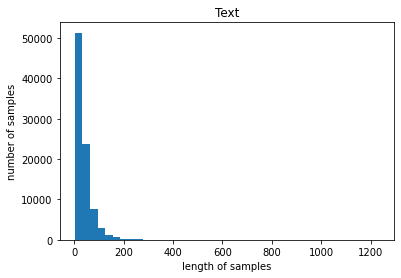

In [27]:
# 길이 분포
text_len = [len(s.split()) for s in data['Text']]
summary_len = [len(s.split()) for s in data['Summary']]

print('텍스트의 최소 길이 : {}'.format(np.min(text_len)))
print('텍스트의 최대 길이 : {}'.format(np.max(text_len)))
print('텍스트의 평균 길이 : {}'.format(np.mean(text_len)))
print('요약의 최소 길이 : {}'.format(np.min(summary_len)))
print('요약의 최대 길이 : {}'.format(np.max(summary_len)))
print('요약의 평균 길이 : {}'.format(np.mean(summary_len)))

plt.subplot(1,2,1)
plt.boxplot(summary_len)
plt.title('Summary')
plt.subplot(1,2,2)
plt.boxplot(text_len)
plt.title('Text')
plt.tight_layout()
plt.show()

plt.title('Summary')
plt.hist(summary_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

plt.title('Text')
plt.hist(text_len, bins = 40)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [28]:
# 임의로 길이를 지정
text_max_len = 50
summary_max_len = 8

In [29]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s.split()) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))))

In [30]:
below_threshold_len(text_max_len, data['Text'])
below_threshold_len(summary_max_len,  data['Summary'])

전체 샘플 중 길이가 50 이하인 샘플의 비율: 0.7746364099371852
전체 샘플 중 길이가 8 이하인 샘플의 비율: 0.9400260313508008


In [31]:
# 정해진 길이보다 길면 제외하는 방법을 사용
data = data[data['Text'].apply(lambda x: len(x.split()) <= text_max_len)]
data = data[data['Summary'].apply(lambda x: len(x.split()) <= summary_max_len)]
print('전체 샘플수 :', (len(data)))

전체 샘플수 : 65693


### 시작토큰과 종료토큰 추가

In [32]:
data['decoder_input'] = data['Summary'].apply(lambda x : 'sostoken '+ x)
data['decoder_target'] = data['Summary'].apply(lambda x : x + ' eostoken')
data.head()

,Text,Summary,decoder_input,decoder_target
0,bought several vitality canned dog food produc...,good quality dog food,sostoken good quality dog food,good quality dog food eostoken
1,product arrived labeled jumbo salted peanuts p...,not as advertised,sostoken not as advertised,not as advertised eostoken
2,confection around centuries light pillowy citr...,delight says it all,sostoken delight says it all,delight says it all eostoken
3,looking secret ingredient robitussin believe f...,cough medicine,sostoken cough medicine,cough medicine eostoken
4,great taffy great price wide assortment yummy ...,great taffy,sostoken great taffy,great taffy eostoken


In [33]:
encoder_input = np.array(data['Text']) # 인코더의 입력
decoder_input = np.array(data['decoder_input']) # 디코더의 입력
decoder_target = np.array(data['decoder_target']) # 디코더의 레이블

In [34]:
indices = np.arange(encoder_input.shape[0])
np.random.shuffle(indices)
print(indices)

[45454 45823 61185 ... 55785 14447 41962]


In [35]:
encoder_input = encoder_input[indices]
decoder_input = decoder_input[indices]
decoder_target = decoder_target[indices]

In [38]:
n_of_val = int(len(encoder_input)*0.2)
print('테스트 데이터의 수 :', n_of_val)

테스트 데이터의 수 : 13138


In [39]:
encoder_input_train = encoder_input[:-n_of_val]
decoder_input_train = decoder_input[:-n_of_val]
decoder_target_train = decoder_target[:-n_of_val]

encoder_input_test = encoder_input[-n_of_val:]
decoder_input_test = decoder_input[-n_of_val:]
decoder_target_test = decoder_target[-n_of_val:]

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 52555
훈련 레이블의 개수 : 52555
테스트 데이터의 개수 : 13138
테스트 레이블의 개수 : 13138


In [36]:
encoder_input[:5], decoder_input[:5], decoder_target[:5]

(array(['stuff good nice dark chocolate flavor yummy red berries throughout sweet granola flavors blend well terrific snack enjoyed vanilla yogurt lot often even dark chocolate fan red berry fan granola fan sure love nature path yummy mixture staple pantry',
        'try keep case ham food storage time used cans stocked years tasted great',
        'purchased used brands flavors pods available tasted like watered coffee pods make truly strong full bodied aroatic cup coffee even use mug setting never buy pods',
        'surprised good tasted sweet really taste pineapple also calories per oz serving mixes well water tea also strong instant tea taste would definately buy',
        'almonds one healthy satisfying foods find nice spicy right snack size debated getting big tins small bags helps control overeating mindless snack munching'],
       dtype=object),
 array(['sostoken this is gooood', 'sostoken dam fine ham',
        'sostoken best pod coffee ever', 'sostoken tasty',
        'sost

In [37]:
data.iloc[indices]

,Text,Summary,decoder_input,decoder_target
66896,stuff good nice dark chocolate flavor yummy re...,this is gooood,sostoken this is gooood,this is gooood eostoken
67471,try keep case ham food storage time used cans ...,dam fine ham,sostoken dam fine ham,dam fine ham eostoken
92280,purchased used brands flavors pods available t...,best pod coffee ever,sostoken best pod coffee ever,best pod coffee ever eostoken
70297,surprised good tasted sweet really taste pinea...,tasty,sostoken tasty,tasty eostoken
43512,almonds one healthy satisfying foods find nice...,healthy delicious snack,sostoken healthy delicious snack,healthy delicious snack eostoken
...,...,...,...,...
6141,great value great size snack even share great ...,snyder of hanover honey mustard onion pieces,sostoken snyder of hanover honey mustard onion...,snyder of hanover honey mustard onion pieces e...
29264,purchased popcorn along popcorn machine church...,great popcorn great value,sostoken great popcorn great value,great popcorn great value eostoken
83807,thought going size ones grocery store found sm...,smaller than the ones in the stores,sostoken smaller than the ones in the stores,smaller than the ones in the stores eostoken
19856,like keurig thing say haste purchase product m...,nice,sostoken nice,nice eostoken


train_test_split을 싸용하려면 우선 train과 test를 분리하고 encoder, decoder분리를 해야겠다.

### 정수 인코딩
단어들을 모두 정수로 바꿔줘야한다. -> 단어에 고유한 정수를 맵핑 = 단어 집합을 만든다.

In [40]:
# keras의 Tokenizer을 사용하면 단어 집합을 만들 수 있다.
src_tokenizer = Tokenizer() # 토크나이저 정의
src_tokenizer.fit_on_texts(encoder_input_train) # 입력된 데이터로부터 단어 집합 생성

In [42]:
# 단어집합을 다 사용하는 것이 아니라 빈도수가 낮은 단어들은 제외시킨다.
src_tokenizer.word_counts.items()

odict_items([('stuff', 2327), ('good', 14725), ('nice', 2949), ('dark', 1304), ('chocolate', 4321), ('flavor', 9805), ('yummy', 843), ('red', 596), ('berries', 149), ('throughout', 96), ('sweet', 3364), ('granola', 471), ('flavors', 2454), ('blend', 1218), ('well', 4376), ('terrific', 189), ('snack', 2456), ('enjoyed', 817), ('vanilla', 802), ('yogurt', 354), ('lot', 2105), ('often', 520), ('even', 3959), ('fan', 824), ('berry', 260), ('sure', 1780), ('love', 10372), ('nature', 133), ('path', 29), ('mixture', 99), ('staple', 164), ('pantry', 213), ('try', 4191), ('keep', 2070), ('case', 1029), ('ham', 68), ('food', 5522), ('storage', 99), ('time', 5091), ('used', 3215), ('cans', 820), ('stocked', 84), ('years', 2111), ('tasted', 1697), ('great', 14355), ('purchased', 1647), ('brands', 1216), ('pods', 279), ('available', 1067), ('like', 15752), ('watered', 99), ('coffee', 9818), ('make', 4314), ('truly', 339), ('strong', 2073), ('full', 1267), ('bodied', 219), ('aroatic', 1), ('cup', 32

In [43]:
threshold = 7
total_cnt = len(src_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in src_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 31940
등장 빈도가 6번 이하인 희귀 단어의 수: 23690
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 8250
단어 집합에서 희귀 단어의 비율: 74.17031934877896
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.3832647072743622


* word_index = 생성된 단어 집합
* word_counts = 각 단어의 빈도수

* 위 결과를 해석:
    1. 단어 집합에서 희귀 단어의 비율은 74%이지만 등장 빈도는 3%밖에 안된다.

In [44]:
src_vocab = 8000
src_tokenizer = Tokenizer(num_words=src_vocab) # 단어 집합의 크기를 8,000으로 제한
src_tokenizer.fit_on_texts(encoder_input_train) # 단어 집합 재생성.

In [45]:
# 텍스트 시퀀스를 정수 시퀀스로 변환
encoder_input_train = src_tokenizer.texts_to_sequences(encoder_input_train) 
encoder_input_test = src_tokenizer.texts_to_sequences(encoder_input_test)

# 잘 진행되었는지 샘플 출력
print(encoder_input_train[:3])

[[80, 2, 54, 186, 28, 9, 299, 404, 1288, 1762, 37, 509, 70, 198, 27, 1072, 69, 318, 328, 655, 91, 463, 33, 186, 28, 314, 404, 846, 314, 509, 314, 122, 6, 1400, 3633, 299, 1735, 1211, 981], [30, 95, 241, 2233, 19, 1736, 21, 43, 316, 1923, 90, 134, 3], [140, 43, 199, 70, 791, 228, 134, 1, 1737, 8, 791, 29, 688, 94, 189, 962, 41, 8, 33, 20, 1492, 1443, 78, 17, 791]]


In [46]:
# summary데이터에 대해서도 동일한 잡업을 한다.
tar_tokenizer = Tokenizer()
tar_tokenizer.fit_on_texts(decoder_input_train)

In [47]:
threshold = 6
total_cnt = len(tar_tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tar_tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print('단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 %s'%(total_cnt - rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 10540
등장 빈도가 5번 이하인 희귀 단어의 수: 8160
단어 집합에서 희귀 단어를 제외시킬 경우의 단어 집합의 크기 2380
단어 집합에서 희귀 단어의 비율: 77.41935483870968
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 5.903360347809585


In [48]:
tar_vocab = 2000
tar_tokenizer = Tokenizer(num_words=tar_vocab) 
tar_tokenizer.fit_on_texts(decoder_input_train)
tar_tokenizer.fit_on_texts(decoder_target_train)

# 텍스트 시퀀스를 정수 시퀀스로 변환
decoder_input_train = tar_tokenizer.texts_to_sequences(decoder_input_train) 
decoder_target_train = tar_tokenizer.texts_to_sequences(decoder_target_train)
decoder_input_test = tar_tokenizer.texts_to_sequences(decoder_input_test)
decoder_target_test = tar_tokenizer.texts_to_sequences(decoder_target_test)

# 잘 변환되었는지 확인
print('input')
print('input ',decoder_input_train[:5])
print('target')
print('decoder ',decoder_target_train[:5])

input
input  [[1, 15, 19], [1, 254, 1164], [1, 7, 1359, 13, 33], [1, 29], [1, 49, 17, 39]]
target
decoder  [[15, 19, 2], [254, 1164, 2], [7, 1359, 13, 33, 2], [29, 2], [49, 17, 39, 2]]


다 따로따로 만들어야 하는데... 먼저 전처리를 다 한 후 삭제하면 안되는것인가...

전체 데이터에서 빈도수가 낮은 단어를 삭제했기 때문에 빈도수가 낮은 단어만으로 구성되었던 문장의 경우 빈 값이 될 수 있다. 때문에 삭제해야한다. 주의할 점은 decoder의 경우 sostoken과 eostoken이 추가되었기 때문에 길이가 1로 나올 것이다.

In [50]:
drop_train = [index for index, sentence in enumerate(decoder_input_train) if len(sentence) == 1]
drop_test = [index for index, sentence in enumerate(decoder_input_test) if len(sentence) == 1]

print('삭제할 훈련 데이터의 개수 :', len(drop_train))
print('삭제할 테스트 데이터의 개수 :', len(drop_test))

삭제할 훈련 데이터의 개수 : 1272
삭제할 테스트 데이터의 개수 : 365


In [51]:
encoder_input_train = np.delete(encoder_input_train, drop_train, axis=0)
decoder_input_train = np.delete(decoder_input_train, drop_train, axis=0)
decoder_target_train = np.delete(decoder_target_train, drop_train, axis=0)

encoder_input_test = np.delete(encoder_input_test, drop_test, axis=0)
decoder_input_test = np.delete(decoder_input_test, drop_test, axis=0)
decoder_target_test = np.delete(decoder_target_test, drop_test, axis=0)

print('훈련 데이터의 개수 :', len(encoder_input_train))
print('훈련 레이블의 개수 :', len(decoder_input_train))
print('테스트 데이터의 개수 :', len(encoder_input_test))
print('테스트 레이블의 개수 :', len(decoder_input_test))

훈련 데이터의 개수 : 51283
훈련 레이블의 개수 : 51283
테스트 데이터의 개수 : 12773
테스트 레이블의 개수 : 12773


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


### 패딩하기

In [52]:
# 샘플들의 길이을 맞추는 패딩을 해줘야 한다.
# 최대 길이보다 짧은 데이터는 0을 넣어주어 최대 길이로 길이를 맞춘다.
encoder_input_train = pad_sequences(encoder_input_train, maxlen=text_max_len, padding='post')
encoder_input_test = pad_sequences(encoder_input_test, maxlen=text_max_len, padding='post')
decoder_input_train = pad_sequences(decoder_input_train, maxlen=summary_max_len, padding='post')
decoder_target_train = pad_sequences(decoder_target_train, maxlen=summary_max_len, padding='post')
decoder_input_test = pad_sequences(decoder_input_test, maxlen=summary_max_len, padding='post')
decoder_target_test = pad_sequences(decoder_target_test, maxlen=summary_max_len, padding='post')

## 3. 모델 설계하기

In [53]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# 인코더 설계 시작
embedding_dim = 128
hidden_size = 256

# 인코더
encoder_inputs = Input(shape=(text_max_len,))

# 인코더의 임베딩 층
enc_emb = Embedding(src_vocab, embedding_dim)(encoder_inputs)

# 인코더의 LSTM 1
encoder_lstm1 = LSTM(hidden_size, return_sequences=True, return_state=True ,dropout = 0.4, recurrent_dropout = 0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(enc_emb)

# 인코더의 LSTM 2
encoder_lstm2 = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

# 인코더의 LSTM 3
encoder_lstm3 = LSTM(hidden_size, return_state=True, return_sequences=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

In [54]:
# 디코더 설계
decoder_inputs = Input(shape=(None,))

# 디코더의 임베딩 층
dec_emb_layer = Embedding(tar_vocab, embedding_dim)
dec_emb = dec_emb_layer(decoder_inputs)

# 디코더의 LSTM
decoder_lstm = LSTM(hidden_size, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, _, _ = decoder_lstm(dec_emb, initial_state=[state_h, state_c])

In [55]:
# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_outputs) 

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
______________________________________________________________________________________________

디코더의 출력층은 다중클래스 분류 문제로 풀어야해서 softmax를 사용했다.    
지금까지 설계한 것이 기본 seq2seq이다.

### 어텐션 메커니즘

In [56]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/thushv89/attention_keras/master/src/layers/attention.py", filename="attention.py")
from attention import AttentionLayer

In [57]:
# 디코더의 출력층을 어텐션 메커니즘으로 수정한다.
# 어텐션 층(어텐션 함수)
attn_layer = AttentionLayer(name='attention_layer')
# 인코더와 디코더의 모든 time step의 hidden state를 어텐션 층에 전달하고 결과를 리턴
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

# 어텐션의 결과와 디코더의 hidden state들을 연결
decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])

# 디코더의 출력층
decoder_softmax_layer = Dense(tar_vocab, activation='softmax')
decoder_softmax_outputs = decoder_softmax_layer(decoder_concat_input)

# 모델 정의
model = Model([encoder_inputs, decoder_inputs], decoder_softmax_outputs)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 50)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 50, 128)      1024000     input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 50, 256), (N 394240      embedding[0][0]                  
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, None)]       0                                            
____________________________________________________________________________________________

인코더의 hidden state와 디코더의 hidden state들을 어텐션 함수 입력으로 넣고,    
어텐션 함수가 리턴한 값을 디코더의 hidden state와 함께 활용하도록 설계

## 4. 모델 훈련하기

In [58]:
model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy')
es = EarlyStopping(monitor='val_loss', patience=2, verbose=1)
history = model.fit(x=[encoder_input_train, decoder_input_train], y=decoder_target_train, \
          validation_data=([encoder_input_test, decoder_input_test], decoder_target_test), \
          batch_size=256, callbacks=[es], epochs=50)

Epoch 1/50
201/201 [==============================] - 156s 724ms/step - loss: 3.1518 - val_loss: 2.4315
Epoch 2/50
201/201 [==============================] - 147s 733ms/step - loss: 2.4139 - val_loss: 2.3070
Epoch 3/50
201/201 [==============================] - 147s 734ms/step - loss: 2.2602 - val_loss: 2.1776
Epoch 4/50
201/201 [==============================] - 147s 731ms/step - loss: 2.1398 - val_loss: 2.0893
Epoch 5/50
201/201 [==============================] - 146s 728ms/step - loss: 2.0492 - val_loss: 2.0265
Epoch 6/50
201/201 [==============================] - 148s 736ms/step - loss: 1.9747 - val_loss: 1.9915
Epoch 7/50
201/201 [==============================] - 147s 733ms/step - loss: 1.9139 - val_loss: 1.9744
Epoch 8/50
201/201 [==============================] - 148s 738ms/step - loss: 1.8700 - val_loss: 1.9378
Epoch 9/50
201/201 [==============================] - 148s 734ms/step - loss: 1.8329 - val_loss: 1.9144
Epoch 10/50
201/201 [==============================] - 147s 732m

**EarlyStopping??**    
성능이 더이상 증가하지 않는다면 중지시킨다.    
https://3months.tistory.com/424    
여기서는 EarlyStopping보다는 Model Choice를 추천하고 있다. EarlyStopping은 중지가 되었을 때는 그전 모델보다 validation error가 높은 상태이기 때문이다. 가장 Validation performance가 좋은 모델을 저장하는 기능이 바로 ModelCheckpoint이다. validation error들을 모니터링하면서 이전 epoch에 비해 성능이 좋으면 저장하고, 트레이닝이 중지되었을 때 성능이 가장 좋았던 모델을 반환한다.    
`from keras.callbacks import ModelCheckpoint`

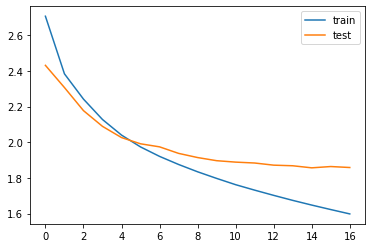

In [59]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

## 5. 인퍼런스 모델 구현하기
테스트 단계에서는 텍스트 데이터를 실제 데이터로 복원해야 한다.    
훈련 단계에서는 정답 문장이 있었기 때문에 모델 하나만 준비했다면 인퍼런스 단계에서는 방식이 달라 그에 맞게 모델 설계를 해야 한다.-> 이때는 인코더와 디코더를 분리해서 설계한다.

### 인코더 설계

In [60]:
# 인코더 설계
encoder_model = Model(inputs=encoder_inputs, outputs=[encoder_outputs, state_h, state_c])

# 이전 시점의 상태들을 저장하는 텐서
decoder_state_input_h = Input(shape=(hidden_size,))
decoder_state_input_c = Input(shape=(hidden_size,))

dec_emb2 = dec_emb_layer(decoder_inputs)

# 문장의 다음 단어를 예측하기 위해서 초기 상태(initial_state)를 이전 시점의 상태로 사용. 이는 뒤의 함수 decode_sequence()에 구현
# 훈련 과정에서와 달리 LSTM의 리턴하는 은닉 상태와 셀 상태인 state_h와 state_c를 버리지 않음.
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=[decoder_state_input_h, decoder_state_input_c])

### 디코더 설계
이부분 이해가 잘 안간다.

In [61]:
# 어텐션 함수
decoder_hidden_state_input = Input(shape=(text_max_len, hidden_size))
attn_out_inf, attn_states_inf = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inf_concat = Concatenate(axis=-1, name='concat')([decoder_outputs2, attn_out_inf])

# 디코더의 출력층
decoder_outputs2 = decoder_softmax_layer(decoder_inf_concat) 

# 최종 디코더 모델
decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input,decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [63]:
def decode_sequence(input_seq):
    # 입력으로부터 인코더의 상태를 얻음
    e_out, e_h, e_c = encoder_model.predict(input_seq)

     # <SOS>에 해당하는 토큰 생성
    target_seq = np.zeros((1,1))
    target_seq[0, 0] = tar_word_to_index['sostoken']

    stop_condition = False
    decoded_sentence = ''
    while not stop_condition: # stop_condition이 True가 될 때까지 루프 반복

        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = tar_index_to_word[sampled_token_index]

        if (sampled_token!='eostoken'):
            decoded_sentence += ' '+sampled_token

        #  <eos>에 도달하거나 최대 길이를 넘으면 중단.
        if (sampled_token == 'eostoken'  or len(decoded_sentence.split()) >= (summary_max_len-1)):
            stop_condition = True

        # 길이가 1인 타겟 시퀀스를 업데이트
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # 상태를 업데이트 합니다.
        e_h, e_c = h, c

    return decoded_sentence

## 6. 모델 테스트하기

In [86]:
src_index_to_word = src_tokenizer.index_word
tar_index_to_word = tar_tokenizer.index_word
tar_word_to_index = tar_tokenizer.word_index

In [87]:
# 원문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2text(input_seq):
    temp=''
    for i in input_seq:
        if (i!=0):
            temp = temp + src_index_to_word[i]+' '
    return temp

# 요약문의 정수 시퀀스를 텍스트 시퀀스로 변환
def seq2summary(input_seq):    
    temp=''
    for i in input_seq:
        if ((i!=0 and i!=tar_word_to_index['sostoken']) and i!=tar_word_to_index['eostoken']):
            temp = temp + tar_index_to_word[i] + ' '
    return temp

In [88]:
for i in range(50, 100):
    print("원문 :", seq2text(encoder_input_test[i]))
    print("실제 요약 :", seq2summary(decoder_input_test[i]))
    print("예측 요약 :", decode_sequence(encoder_input_test[i].reshape(1, text_max_len)))
    print("\n")

원문 : recommend six month old golden retriever strong chewer devoured less five minutes expensive treat hoping pay vet bill top price edible nylabone never buy 
실제 요약 : not recommended 
예측 요약 :  my dog loves these


원문 : daughter ordered packages pamela bread birthday year makes best loaf bread years texture wonderful taste great great sandwiches toast plain bread butter meal think bread good would highly reccomend everyone fact husband celiac loves 
실제 요약 : great bread 
예측 요약 :  great bread


원문 : popcorn sweeter flavorful brand used buy store hooked favorite purple usually mix three together good tastes excellent healthy cooked pressed coconut oil 
실제 요약 : love it 
예측 요약 :  great northern popcorn


원문 : say classic candies amazing taste probably went six packs many months gonna get never wonderful 
실제 요약 : love these 
예측 요약 :  great gift


원문 : far favorite chai big train certainly knows comes powdered beverage vanilla chai hits spot whether make hot iced order arrived get recommend p

예측 요약 :  great for the price


원문 : idea chip alternative may something like bag pop chips lots flavor lots crunch hold next sandwich eat fast spices get nose make sit back enjoy bite 
실제 요약 : light flavorful alternative for chip 
예측 요약 :  good but not great


원문 : great idea find grounds get coffee coffee come maker nice regular kcups messy comes misses mug still nice quite good orginal 
실제 요약 : good idea but needs some work 
예측 요약 :  great coffee


원문 : occasionally piece prune pit otherwise great fact organic helps recommend heartily 
실제 요약 : prunes rock 
예측 요약 :  great for


원문 : snacks unusual customer service customer feedback attention customer makes company worth business 
실제 요약 : great company great customer service 
예측 요약 :  great product


원문 : bought eden brand find taste better recommend good sense brand moist eden dry appear made us hard really know great snacks come bags good sense gets vote 
실제 요약 : very tasty and better than others 
예측 요약 :  great product


원문 : three 

성능을 개선하기 위해서는 사전 훈련된 워드 임베딩, 빔서치, 인코더-디코더 자체의 구조를 새로이 변경하는 트랜스포머 같은 방안이 존재한다.

# 추출적 요약 하기

In [89]:
import requests
from summa.summarizer import summarize

In [90]:
text = requests.get('http://rare-technologies.com/the_matrix_synopsis.txt').text

In [92]:
# summarize 사용하기
print('Summary:')
print(summarize(text, ratio=0.005))

Summary:
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.


In [93]:
print('Summary:')
print(summarize(text, ratio=0.005, split=True))

Summary:
['Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.', 'Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.']


In [94]:
print('Summary:')
print(summarize(text, words=50))

Summary:
Trinity takes Neo to Morpheus.
Morpheus, Trinity, Neo, Apoc, Switch, Mouse and Cypher are jacked into the Matrix.
Trinity brings the helicopter down to the floor that Morpheus is on and Neo opens fire on the three Agents.
